In [20]:
import sklearn.datasets
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)


In [ ]:
### In the above code we have imported make_classification function from the sklearn.datasets module
### Sklearn is a python library 
### make classification function is the function use to generate the random datasets for the classification Task
### It creates a synthetic dataset with specified characteristics, making it useful for testing and prototyping machine learning models.
### Inside the make_classification function we have certain parameters
### n_samples = 100 synthetic data generated by the Function
### n_features = total number of features in the dataset
### n_informative - total number of informative features which are basically the features contribute to the classififcation task
### n_redundant = these are the features generated as a linear combinations of the informative features
### n_clusters_per class - group of samples that belong to the same class

In [16]:
import matplotlib.pyplot as plt

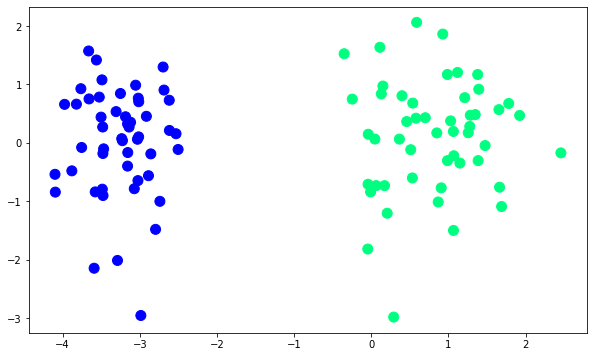

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(X[:,0], X[:,1], c=y, cmap = "winter", s=100)

In [21]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(penalty = "none", solver = "sag")
lor.fit(X,y)

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

##### In the above code we have used the LogisticRegression class to create an instance of Logistic Regession model
##### in the parameters we have used the 'penalty' as none it signifies that we are not using the regularization.
##### Regularization is used  to prevent the overfitting by adding a penalty term to the Error Function.
##### and 'Solver' = sag  means the optimization algo. to use for the model which in this case is the Stohastic Average Gradient.

In [23]:
print(lor.coef_)
print(lor.intercept_)

[[4.89517126 0.23622686]]
[5.85391805]


In [25]:
slope_decision_boundary = -((lor.coef_[0][0])/(lor.coef_[0][1]))
intercept_decision_boundary = -((lor.intercept_)/(lor.coef_[0][1]))

In [27]:
print(slope_decision_boundary)
print(intercept_decision_boundary)

-20.722331590841108
[-24.78091662]


In [29]:
x_line = np.linspace(-3,3,100)
y_line = slope_decision_boundary*x_line + intercept_decision_boundary

In [42]:
### Now we will apply the Gradient Descent to this above model

def GD(X,y):
    X = np.insert(X, 0, 1, axis =1)
    weight = np.ones(X.shape[1])
    alpha = 0.5
    
    for i in range(1000):
        y_pred = sigmoid(np.dot(X, weight))
        weight = weight + alpha * (np.dot(y-y_pred, X))/X.shape[0]
        
    return weight[1:], weight[0]

In [33]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [35]:
coef_ , intercept_ = GD(X,y)

In [38]:
updated_slope = -(coef_[0]/ coef_[1])
updated_intercept = -(intercept_/ coef_[1])

In [40]:
x_line_input = np.linspace(-3, 3, 100)
y_line_input = updated_slope * x_line_input + updated_intercept

(-3, 2)

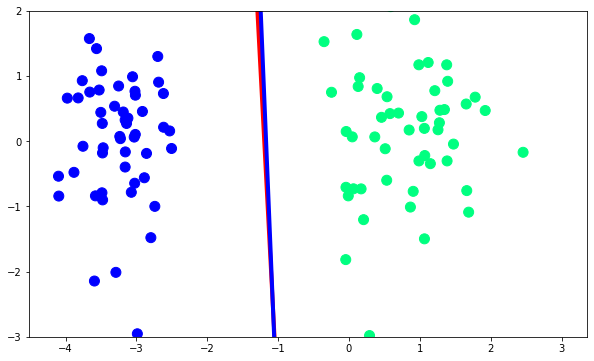

In [43]:
plt.figure(figsize = (10,6))
plt.plot(x_line, y_line, color = 'red', linewidth = 4)
plt.plot(x_line_input, y_line_input, color = 'blue', linewidth = 4)
plt.scatter(X[:,0], X[:,1], c = y , cmap = "winter", s = 100)
plt.ylim(-3,2)